# Exploração e análise de dados da bolsa formação com SQL e Python

### O que seria o bolsa formação: A Bolsa Formação custeia a oferta de vagas gratuitas de cursos técnicos e de formação inicial e continuada.

Este programa integra políticas públicas de educação, inclusão social e desenvolvimento econômico. Geralmente, ele é implementado por meio de parcerias com instituições de ensino e entidades que oferecem cursos técnicos e de capacitação em diversas áreas.



# Os dados

•	UF: Estado onde foi destinada a bolsa

•	MUNICIPIO: onde foi destinada a bolsa

•	DEPEDENCIA ADMINISTRATIVA: (SYSTEM S) plataforma utilizada o	para o gerenciamento interno do programa, (PÚBLICA) é uma plataforma mais voltada para o acesso do público em geral

•	TIPO: tipo de formação da bolsa disponibilizada (FIC) formação Inicial e continuada, (TÉCNICO)

•	MODALIDAE DE ENSINO: educação prensencial, ensino presencial, ensino a distância

•	CURSO: todos os cursos ofertados na bolsa

•	ANO HOMOLOGAÇÃO: refere-se ao ano em que o curso foi oficialmente reconhecido e aprovado pelas autoridades responsáveis.

•	VAGAS HOMOLOGADAS: vagas de bolsa que foi oficialmente aprovada


######A tabela foi criada no SQL SERVER com uma versão dos dados disponibilizados nessse dataset: https://dados.gov.br/dados/conjuntos-dados/bolsa-formacao



#Exploração de dados

### Fase inicial do processo de análise de dados em que irei buscar padrões, características para gerar insights iniciais.

**Qual a quantidade de informações que temos na nossa base de dados?**

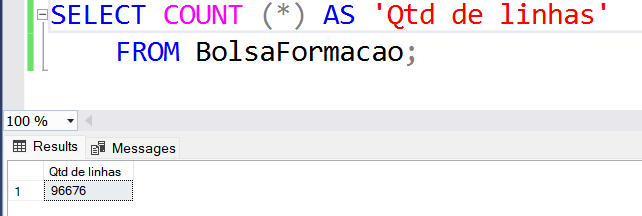

**Como são os dados:**

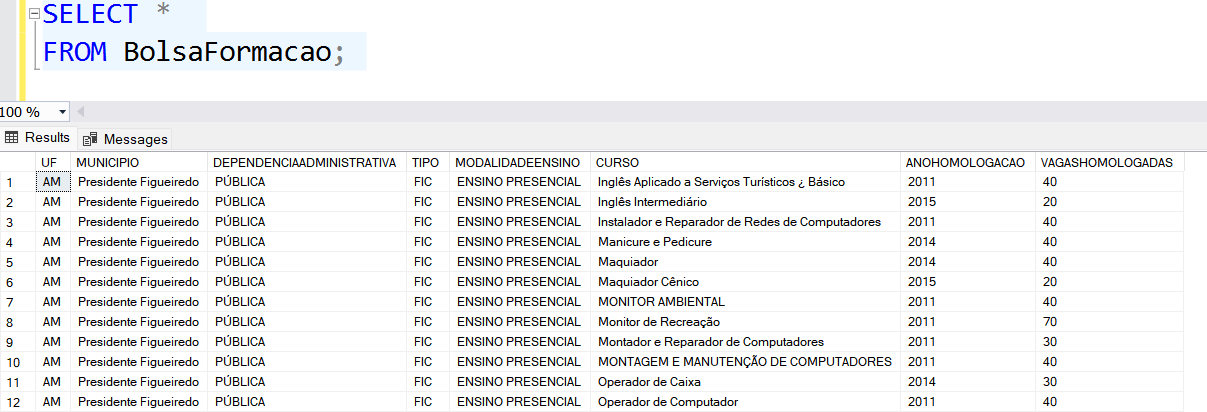

**Quais os tipos de cada dado:**

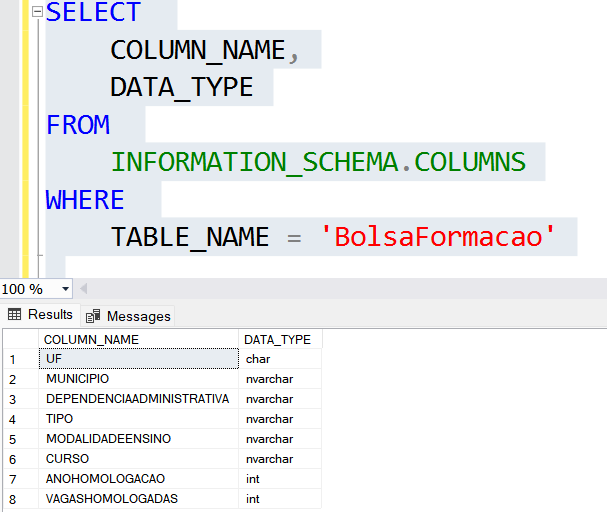

# Análise de dados

### Depois de exploramos os dados e buscamos entender quais infomações temos em nosso banco de dados, podemos analisar as infomações para compreeender o que está acontecendo no dataset. Vamos fazer algumas perguntas:

**Os dez cursos com mais vagas ofertadas:**

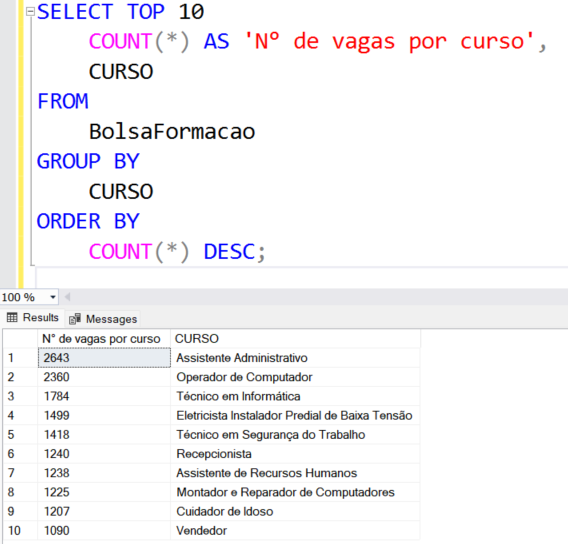


É possível notar uma grande variedade de setores em que os cursos foram selecionados.

**Quantidade de cursos ofertados**

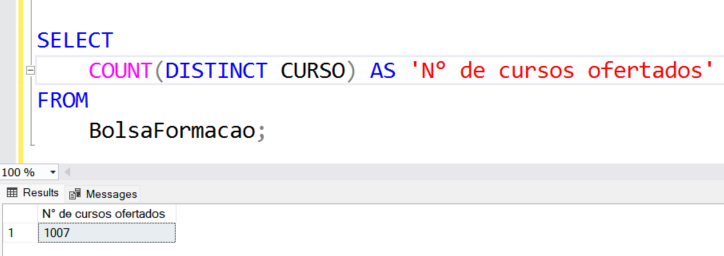

**Anos com maiores disponibilidades de bolsas em ordem decrescente.**

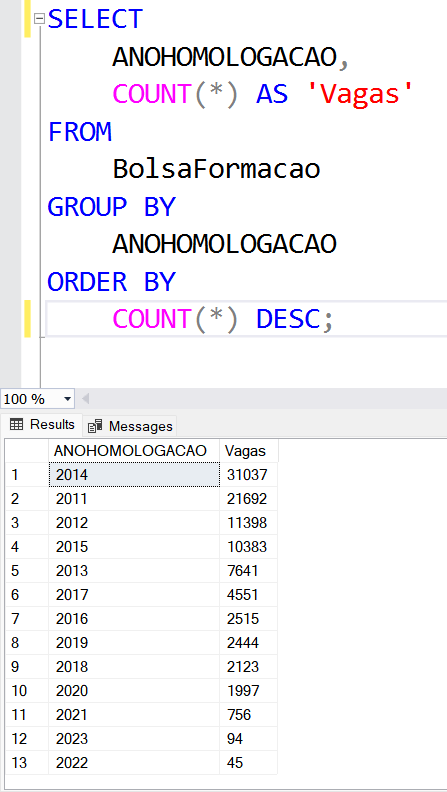

### Análise com gráficos em Pyhon

In [ ]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn



In [ ]:
#Carregando o dataset BolsaFormacao

df = pd.read_csv('BolsaFormacao.csv',sep=',')

# Exibindo as 10 primeiras linhas

df.head(10)

,UF,MUNICIPIO,DEPENDENCIAADMINISTRATIVA,TIPO,MODALIDADEENSINO,CURSO,ANOHOMOLOGACAO,VAGASHOMOLOGADAS
0,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,AUXILIAR TÉCNICO EM AGROPECUÁRIA,2012,30
1,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Avicultor,2012,200
2,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Avicultor,2014,625
3,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Avicultor,2016,70
4,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Balconista de Farmácia,2012,20
5,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Balconista de Farmácia,2014,260
6,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Balconista de Farmácia,2019,20
7,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Bovinocultor de Corte,2014,30
8,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Bovinocultor de Leite,2014,150
9,AC,Cruzeiro do Sul,PÚBLICA,FIC,ENSINO PRESENCIAL,Cabeleireiro,2012,165


####Gráfico histograma mostrando a distribuição do tipo de bolsa!

<Axes: xlabel='TIPO', ylabel='count'>

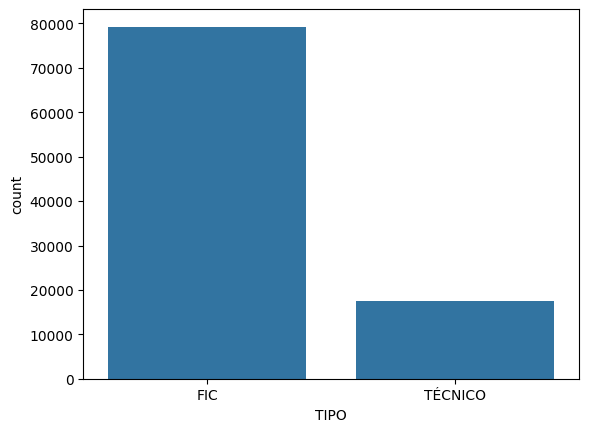

In [ ]:
srn.countplot(x='TIPO',data=df)

####Gráfico de barras monstrando a distribuição dos cursos por categoria de ensino!

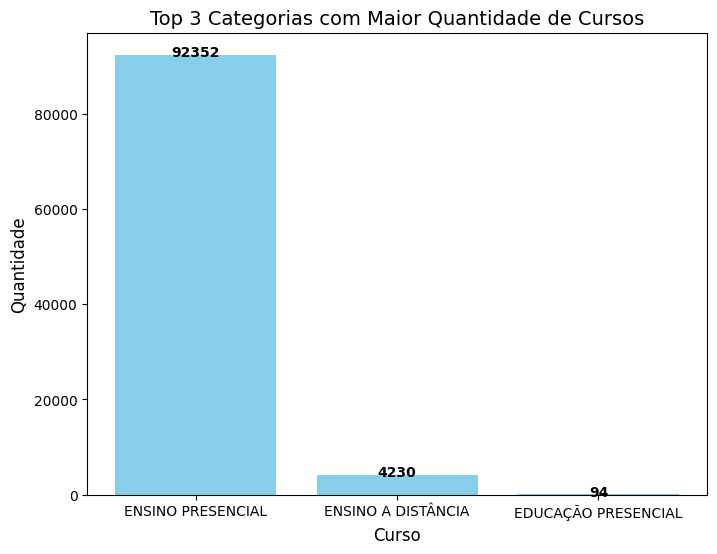

In [ ]:
# Agrupar pela coluna 'Categoria Administrativa' e contar o número de ocorrências
df_BolsaFormacao = df.groupby('MODALIDADEENSINO').size().reset_index(name='Porcentagem')
df_BolsaFormacao

# Obtendo as 3 categorias
top3 = df_BolsaFormacao.nlargest(3,'Porcentagem') # top3 already contains the top 3 categories


# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(top3['MODALIDADEENSINO'], top3['Porcentagem'], color='skyblue') # Changed 'maiores' to 'top3'


# Adicionando título e rótulos
plt.title('Top 3 Categorias com Maior Quantidade de Cursos', fontsize=14)
plt.xlabel('Curso', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

# Adicionando os números dentro das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -1000, round(yval,2), ha='center', va='bottom', color='black', fontweight='bold')

# Exibindo o gráfico
plt.show()

# Conclusão
Essas foram algumas análises extraídas do dataset BolsaFormação.

Alguns insights interessantes:



* Verificando os cursos com maiores vagas notamos uma forte presença da área de Tecnologia da Informação.

* A análise preliminar dos dados sugere uma tendência de diminuição no número de vagas ao longo dos anos, com algumas variações. tendo seu pico em 2014 e seu maior declínio em 2022.

* Vemos que os cursos do tipo: "Formação Inicial e Continuada" tem maior impacto de escolha. Isso se deve por serem cursos mais acessíveis e podem ser aplicados rapidamente no mercado de trabalho. Além de menor custo e maior disponibilidade.

* Temos uma diferença esmagadora de aproximadamente 95.42% entre o ensino presencial e o ensino EaD. Em um âmbito geral, isso se deve ao fato de que o ensino presencial favorece a interação social e a colaboração entre alunos e professores. Algo mais difícil no ambiente online.